# Линейная алгебра: сходство текстов и аппроксимация функций.
Данное задание основано на материалах секции, посвященной введению в линейную алгебру. Вам понадобится компьютер с установленным интерпретатором Python и подключенными библиотеками NumPy и SciPy.


Вы научитесь:

- читать тексты из файла с помощью Python и разбивать их на слова
- переводить тексты в векторные пространства, вычислять расстояния в этих пространствах
- решать системы линейных уравнений
- приближать любые функции с помощью многочленов

#### Введение
В этом задании вы познакомитесь с некоторыми базовыми методами из линейной алгебры, реализованными в пакете SciPy — в частности, с методами подсчета косинусного расстояния и решения систем линейных уравнений. Обе эти задачи еще много раз встретятся нам в специализации. Так, на решении систем линейных уравнений основана настройка линейных моделей — очень большого и важного класса алгоритмов машинного обучения. Косинусное расстояние же часто используется в анализе текстов для измерения сходства между ними.

#### Инструкция по выполнению

Данное задание состоит из двух частей. В каждой ответом будет набор чисел, который вам нужно будет ввести в соответствующее поле через пробел.

## Задание 1: сравнение предложений.

Дан набор предложений, скопированных с Википедии. Каждое из них имеет "кошачью тему" в одном из трех смыслов:

 - кошки (животные)
 - UNIX-утилита cat для вывода содержимого файлов
 - версии операционной системы OS X, названные в честь семейства кошачьих 

Ваша задача — найти два предложения, которые ближе всего по смыслу к расположенному в самой первой строке. В качестве меры близости по смыслу мы будем использовать косинусное расстояние.

Выполните следующие шаги:

 - Скачайте файл с предложениями (sentences.txt).


 - Каждая строка в файле соответствует одному предложению. Считайте их, приведите каждую к нижнему регистру с помощью строковой функции lower().


 - Произведите токенизацию, то есть разбиение текстов на слова. Для этого можно воспользоваться регулярным выражением, которое считает разделителем любой символ, не являющийся буквой: re.split('[^a-z]', t). Не забудьте удалить пустые слова после разделения.


 - Составьте список всех слов, встречающихся в предложениях. Сопоставьте каждому слову индекс от нуля до (d - 1), где d — число различных слов в предложениях. Для этого удобно воспользоваться структурой dict.


 - Создайте матрицу размера n * d, где n — число предложений. Заполните ее: элемент с индексом (i, j) в этой матрице должен быть равен количеству вхождений j-го слова в i-е предложение. У вас должна получиться матрица размера 22 * 254.


 - Найдите косинусное расстояние от предложения в самой первой строке (In comparison to dogs, cats have not undergone...) до всех остальных с помощью функции scipy.spatial.distance.cosine. Какие номера у двух предложений, ближайших к нему по этому расстоянию (строки нумеруются с нуля)? Эти два числа и будут ответами на задание. Само предложение (In comparison to dogs, cats have not undergone... ) имеет индекс 0.


 - Запишите полученные числа в файл, разделив пробелом. Обратите внимание, что файл должен состоять из одной строки, в конце которой не должно быть переноса. Пример файла с решением вы можете найти в конце задания (submission-1.txt).


 - Совпадают ли ближайшие два предложения по тематике с первым? Совпадают ли тематики у следующих по близости предложений?

In [1]:
import re
import numpy as np
from scipy.spatial.distance import cosine

In [2]:
with open('sentences.txt', 'r') as f:
    data = [re.split('[^a-z]', line.lower()) for line in f.readlines()]

clear_data = [[token for token in line if token != ''] for line in data]

In [3]:
i = 0
tokens = {}

for line in clear_data:
    for token in line:
        if token in tokens:
            continue
        else:
            tokens[token] = i
        i += 1

In [4]:
token_matrix = np.zeros((len(clear_data), len(tokens)))

i = 0

for line in clear_data:
    for token in line:
        token_matrix[i, tokens[token]] += 1
    i += 1

In [5]:
cosine_distances = [(i, cosine(token_matrix[0], token_matrix[i])) for i in range(1, len(clear_data))]
cosine_distances.sort(key = lambda x: x[1])

In [6]:
answer1 = [cosine_distances[0][0], cosine_distances[1][0]]

with open('answer1.txt', 'w') as f:
    f.write(' '.join(map(str, answer1)))

Разумеется, использованный вами метод крайне простой. Например, он не учитывает формы слов (так, cat и cats он считает разными словами, хотя по сути они означают одно и то же), не удаляет из текстов артикли и прочие ненужные слова. Позже мы будем подробно изучать анализ текстов, где выясним, как достичь высокого качества в задаче поиска похожих предложений.

## Задача 2: аппроксимация функции.

Сформируйте систему линейных уравнений (то есть задайте матрицу коэффициентов A и свободный вектор b) для многочлена первой степени, который должен совпадать с функцией f в точках 1 и 15. Решите данную систему с помощью функции scipy.linalg.solve. Нарисуйте функцию f и полученный многочлен. Хорошо ли он приближает исходную функцию?

In [7]:
import scipy
import matplotlib.pyplot as plt
from math import sin, exp

%matplotlib inline

In [8]:
def func(x): 
    return sin(x / 5) * exp(x / 10) + 5 * exp(-x / 2)

In [9]:
a1 = [[1, 1], [1, 15]]
b1 = [func(x) for x in [1, 15]]

w1 = scipy.linalg.solve(a1, b1)

In [10]:
def polynomial_one(x):
    return w1[0] + w1[1] * x

x_values = np.arange(1, 15, 0.1)
p1 = [polynomial_one(x) for x in x_values]
func_values = [func(x) for x in x_values]

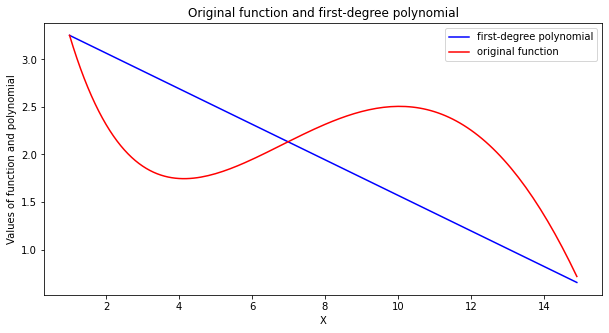

In [11]:
plt.figure(figsize=(10, 5))
plt.plot(x_values, p1, c='b', label='first-degree polynomial')
plt.plot(x_values, func_values, c='r', label='original function')
plt.xlabel('X')
plt.ylabel('Values of function and polynomial')
plt.title('Original function and first-degree polynomial')
plt.legend()

Повторите те же шаги для многочлена второй степени, который совпадает с функцией f в точках 1, 8 и 15. Улучшилось ли качество аппроксимации?

In [12]:
a2 = [[1, 1, 1], [1, 8, 64], [1, 15, 225]]
b2 = [func(x) for x in [1, 8, 15]]

w2 = scipy.linalg.solve(a2, b2)

In [13]:
def polynomial_two(x):
    return w2[0] + w2[1] * x + w2[2] * x**2

p2 = [polynomial_two(x) for x in x_values]

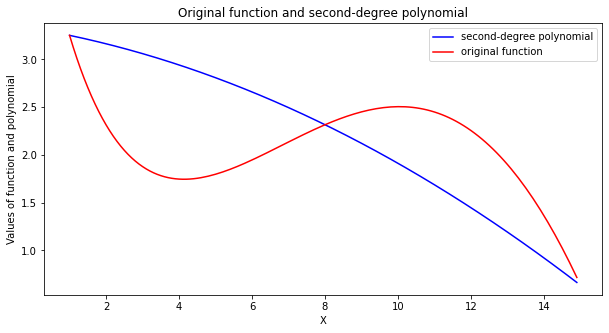

In [14]:
plt.figure(figsize=(10, 5))
plt.plot(x_values, p2, c='b', label='second-degree polynomial')
plt.plot(x_values, func_values, c='r', label='original function')
plt.xlabel('X')
plt.ylabel('Values of function and polynomial')
plt.title('Original function and second-degree polynomial')
plt.legend()

Повторите те же шаги для многочлена третьей степени, который совпадает с функцией f в точках 1, 4, 10 и 15. Хорошо ли он аппроксимирует функцию? Коэффициенты данного многочлена (четыре числа в следующем порядке: w_0, w_1, w_2, w_3) являются ответом на задачу. Округлять коэффициенты не обязательно, но при желании можете произвести округление до второго знака (т.е. до числа вида 0.42)

In [15]:
a3 = [[1, x, x ** 2, x ** 3] for x in (1, 4, 10, 15)]
b3 = [func(x) for x in [1, 4, 10, 15]]

w3 = scipy.linalg.solve(a3, b3)

In [16]:
def polynomial_three(x):
    return w3[0] + w3[1] * x + w3[2] * x**2 + w3[3] * x**3

p3 = [polynomial_three(x) for x in x_values]

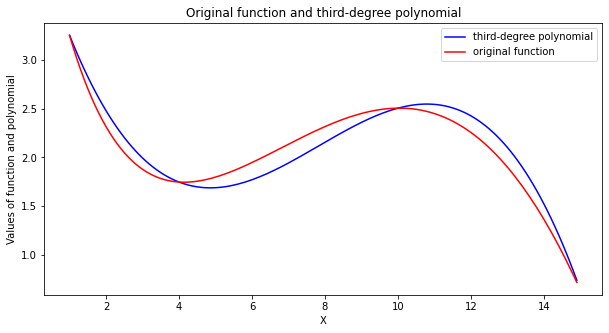

In [17]:
plt.figure(figsize=(10, 5))
plt.plot(x_values, p3, c='b', label='third-degree polynomial')
plt.plot(x_values, func_values, c='r', label='original function')
plt.xlabel('X')
plt.ylabel('Values of function and polynomial')
plt.title('Original function and third-degree polynomial')
plt.legend()

In [18]:
answer2 = w3

with open('answer2.txt', 'w') as f:
    f.write(' '.join(map(str, answer2)))